In [5]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import os
import re
import subprocess

import functions
import importlib
importlib.reload(functions)
from functions import *

import warnings
warnings.filterwarnings("ignore")
%matplotlib inline

# Set Path To Video

In [1]:
path_to_video = 'Full/path/to/folder/with/videos/'

### Default Paths

In [2]:
temp_folder = "F:/Temp/For_article_4/Temp/"
img = temp_folder + "maska.png"
predefined_class = temp_folder +  "predefined_classes.txt"

# Get coordinates for crop of needed area

In [ ]:
file_name = os.listdir(path_to_video)[0]

In [ ]:
get_img_for_coord(path_to_video, file_name, temp_folder)

In [4]:
subprocess.check_call(['python', 
                       'labelImg.py', 
                       img,  
                       predefined_class, 
                       temp_folder], cwd = temp_folder, shell=True)

0

In [ ]:
coordinates = tuple(get_x_y_from_xml(temp_folder))

# Processing videos

In [12]:
net, outputlayers = load_pretrained_model(temp_folder, 
                                          'yolov3-spp.weights', 
                                          'yolov3-spp.cfg')

In [ ]:
videos_names = os.listdir(path_to_video)

In [ ]:
# videos_names = [i for i in videos_names if ('.avi' in i) or ('.mp4' in i)]

In [ ]:
%%time
for video in videos_names[0]:
    l_temp = processing_video(path_to_video, 
                              video, 
                              5, 
                              net, 
                              outputlayers, 
                              coordinates)

In [8]:
xmin, ymin, xmax, ymax

NameError: name 'xmin' is not defined

In [ ]:
coordinates

In [7]:
image = cv2.imread('Temp/maska.png')

In [8]:
image.shape

(768, 1366, 3)

In [9]:
img_2 = image[3:570, 318:803]

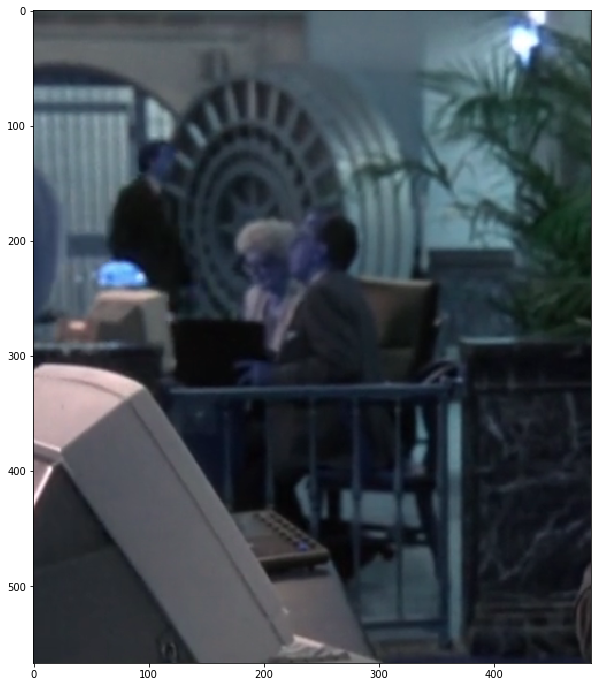

In [10]:
plt.figure(figsize=(14, 12))
plt.imshow(img_2);

In [13]:
boxes, confidences = processing_image(img_2, net, outputlayers, 0.4)

In [14]:
draw_rectangles_on_img(boxes, confidences, img_2)

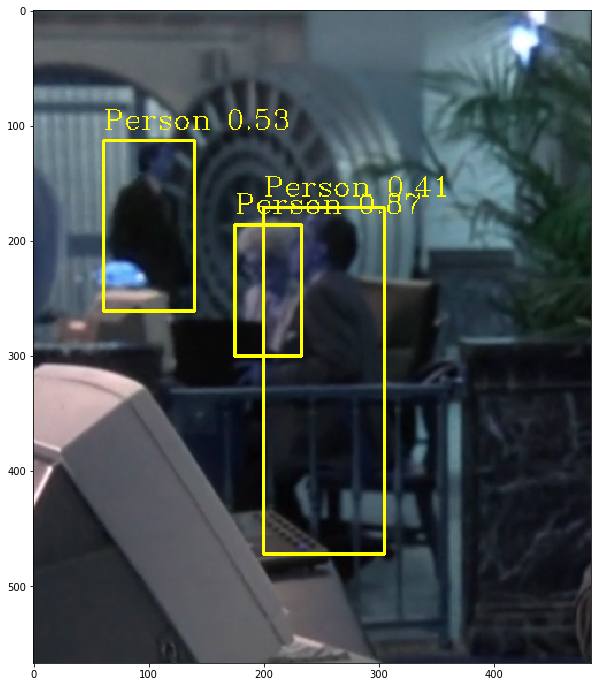

In [15]:
plt.figure(figsize=(14, 12))
plt.imshow(img_2);

In [16]:
cv2.imwrite('Изображение 3.png', img_2)

True